<h6>In tis project the objective is to define the marketing strategy adoptded considering client type</h6>

<h5>Import libraries</h5>

In [25]:
# Scientific Computing 
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


<h5>Data Collection</h5>
<h6>Obtain the tabular data (.csv) from file.</h6>

<h5>Read Data</h5>

In [26]:
df = pd.read_csv("../data/campaign-data.csv")
df

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0,0,0,0,0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0,0,0,0,322500,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0,0,0,0,0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0,3547500,1290000,0,0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0,0,0,0,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,ID-987463,Small Facility,800,20,1003,16-08-2015,0,0,0.0,0.0,0.0,0,0,0,0,0,Low
2972,ID-987463,Small Facility,800,20,1003,16-09-2015,0,0,0.0,0.0,0.0,0,0,0,0,0,High
2973,ID-987463,Small Facility,800,20,1003,16-10-2015,0,0,0.0,0.0,0.0,0,0,2580000,0,0,High
2974,ID-987463,Small Facility,800,20,1003,16-11-2015,0,0,0.0,0.0,0.0,0,0,0,0,0,High


<h5>Feature Engineering</h5>
<h6>The feature engineering step adds two new features ('Calendar_month' and 'Calendar_year') based on the 'Calendardate' column to help in the analysis.</h6>

In [ ]:
class FeatureEngineering:
    # A class to perform feature engineering on the input data.
    def fit(self, X, y=None):
        return self
    
    def fit_transform(self, X):
        # Location Features
        X["Calendardate"] = pd.to_datetime(X["Calendardate"])
        X["Calendar_month"] =  X["Calendardate"].dt.month
        X["Calendar_year"] = X["Calendardate"].dt.year

        return pd.DataFrame(X)

df = FeatureEngineering().fit_transform(df)

print(df.columns, df.columns)
print(df.shape, df.shape)
df.head()

<h5>Data Cleaning</h5>
<h6>Preprocess the data to handle missing values, outliers, duplicates, and inconsistencies. This ensures that the data is accurate and ready for analysis.</h6></p>

In [27]:
df = df.convert_dtypes()
df = df.drop(columns=["Zip Code"])

# Analyze the missing values and duplicates in the DataFrame
def analyze_missing_and_duplicates(data: pd.DataFrame) -> pd.DataFrame:
    n = data.shape[0]
    ret = pd.DataFrame(data.isnull().sum(), columns=["missing_number"])
    ret["percentage_missing_number"] = (ret["missing_number"] / n) * 100
    ret["types"] = data.dtypes
    ret["duplicate"] = data.duplicated(keep=False).sum()
    ret["NAN"] = data.isna().sum()
    return pd.DataFrame(ret)


analyze_missing_and_duplicates(df)

,missing_number,percentage_missing_number,types,duplicate,NAN
Client ID,0,0.0,string,0,0
Client Type,0,0.0,string,0,0
Number of Customers,0,0.0,Int64,0,0
Montly Target,0,0.0,Int64,0,0
Calendardate,0,0.0,string,0,0
Amount Collected,0,0.0,Int64,0,0
Unit Sold,0,0.0,Int64,0,0
Campaign (Email),0,0.0,Float64,0,0
Campaign (Flyer),0,0.0,Float64,0,0
Campaign (Phone),0,0.0,Float64,0,0


<h5>Exploratory Data Analysis (EDA)</h5>
<h6>Perform initial exploration of the data to understand its structure, distribution, and relationships. This involves generating summary statistics, visualizations (e.g., histograms, scatter plots, box plots), and identifying patterns or trends.</h6></p>

In [28]:
print(df.info())
df.describe().T.style.background_gradient(cmap="Oranges").format("{:.2f}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              2976 non-null   string 
 1   Client Type            2976 non-null   string 
 2   Number of Customers    2976 non-null   Int64  
 3   Montly Target          2976 non-null   Int64  
 4   Calendardate           2976 non-null   string 
 5   Amount Collected       2976 non-null   Int64  
 6   Unit Sold              2976 non-null   Int64  
 7   Campaign (Email)       2976 non-null   Float64
 8   Campaign (Flyer)       2976 non-null   Float64
 9   Campaign (Phone)       2976 non-null   Float64
 10  Sales Contact 1        2976 non-null   Int64  
 11  Sales Contact 2        2976 non-null   Int64  
 12  Sales Contact 3        2976 non-null   Int64  
 13  Sales Contact 4        2976 non-null   Int64  
 14  Sales Contact 5        2976 non-null   Int64  
 15  Numb

,count,mean,std,min,25%,50%,75%,max
Number of Customers,2976.00,1456.94,1669.85,0.00,240.00,960.00,2090.00,9840.00
Montly Target,2976.00,75.08,87.04,5.00,10.00,47.50,101.25,510.00
Amount Collected,2976.00,17004398.89,30258030.14,-22161496.00,0.00,3409460.00,20456764.00,207977104.00
Unit Sold,2976.00,121.46,216.41,-63.00,0.00,24.00,147.00,1500.00
Campaign (Email),2976.00,143284.96,723045.16,0.00,0.00,0.00,0.00,11446733.30
Campaign (Flyer),2976.00,685418.60,1727587.37,0.00,0.00,0.00,81482.85,13593951.20
Campaign (Phone),2976.00,29777.43,383213.36,0.00,0.00,0.00,0.00,9617380.00
Sales Contact 1,2976.00,131340.73,1034882.27,0.00,0.00,0.00,0.00,29025000.00
Sales Contact 2,2976.00,2023319.05,3396991.00,0.00,0.00,645000.00,2580000.00,30637500.00
Sales Contact 3,2976.00,1867487.40,3271348.58,0.00,0.00,322500.00,2580000.00,26122500.00


<h6>The Heatmap showing the correlation matrix between Amount Collected (target variable) and the details about customers, helping identify which indicators have the strongest correlation with Amount Collected, aiding in feature selection for modeling.</h6>

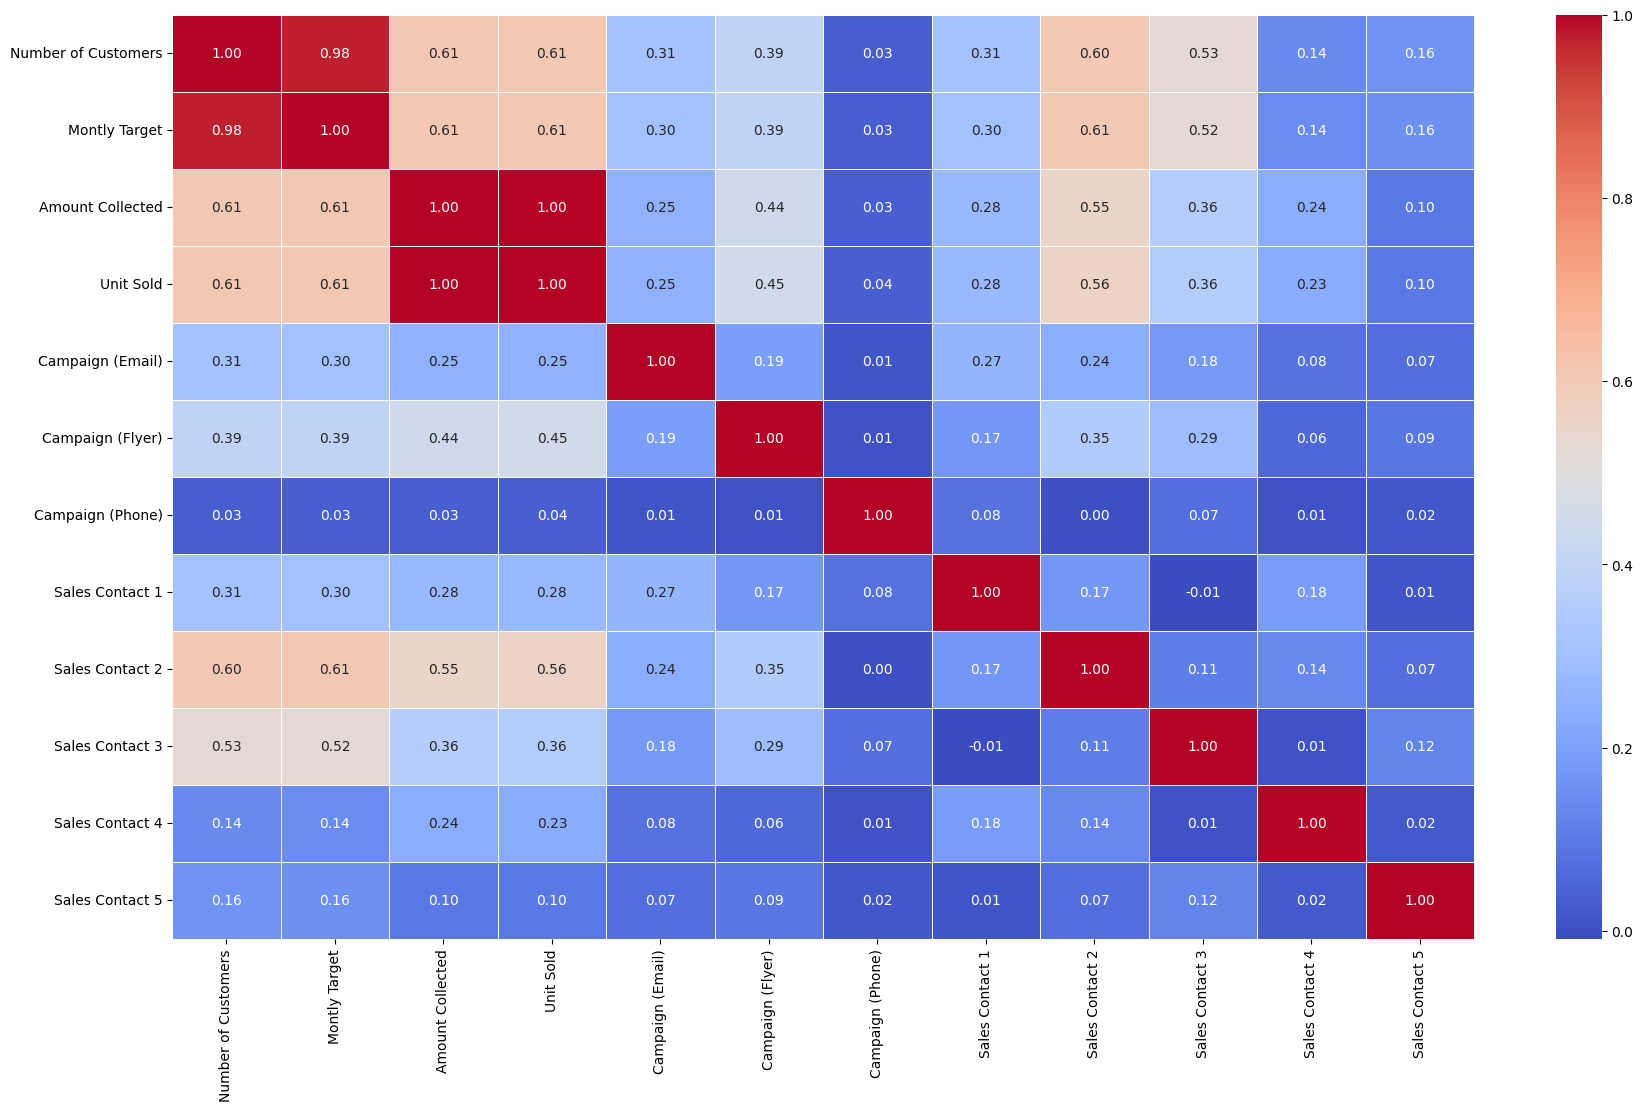

In [29]:
df_corr = df[df.columns].dropna().corr()
plt.figure(figsize=(21, 12))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.savefig("../reports/correlation_matrix.png")
plt.show()

<h6>Created distribution plots for variable to visualize their distributions and identify any outliers or skewness in the data.</h6>

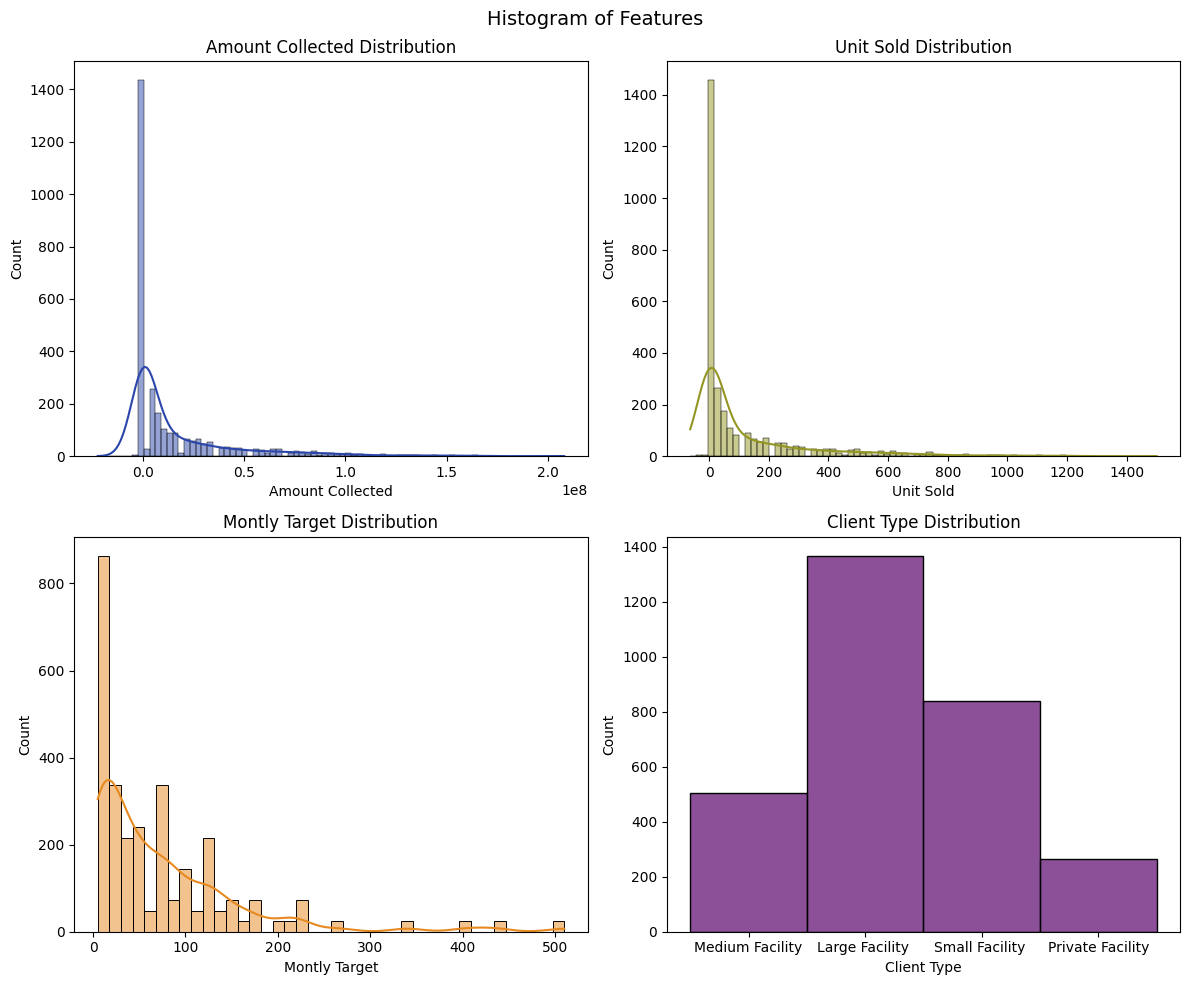

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Distribution plots for each economic indicator
sns.histplot(df["Amount Collected"], kde=True, ax=axes[0], color="#2b46ab")
axes[0].set_title("Amount Collected Distribution")

sns.histplot(df["Unit Sold"], kde=True, ax=axes[1], color="#939623")
axes[1].set_title("Unit Sold Distribution")

sns.histplot(df["Montly Target"], kde=True, ax=axes[2], color="#e68920")
axes[2].set_title("Montly Target Distribution")

sns.histplot(df["Client Type"], ax=axes[3], color="#641675")
axes[3].set_title("Client Type Distribution")

plt.suptitle("Histogram of Features", fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

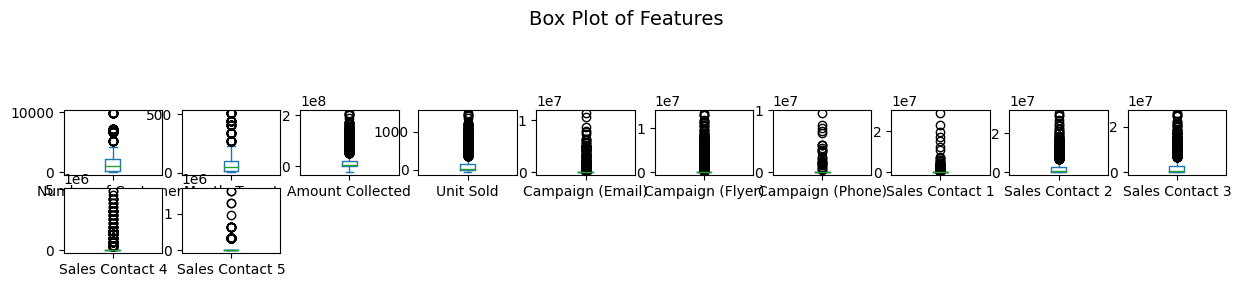

In [41]:
plt.figure(figsize=(12, 8), facecolor="lightgrey")
df.plot(kind="box", layout=(10, 10), subplots=True, sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle("Box Plot of Features", fontsize=14)
plt.show()